In [3]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 통계적 모형
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 머신러닝
from sklearn import datasets
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score, mean_absolute_error

In [4]:
boston = datasets.load_boston()

In [5]:
x = boston.data
y = boston.target

# pd.DataFrame(y, columns=['label'])
# pd.DataFrame(x, columns=boston.feature_names)
boston_raw_data = pd.concat([pd.DataFrame(y, columns=['label']), pd.DataFrame(x, columns=boston.feature_names)], axis=1)

In [6]:
boston_raw_data

,label,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,24.0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,21.6,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,34.7,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,33.4,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,36.2,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,22.4,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,20.6,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,23.9,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,22.0,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [7]:
boston_raw_data.describe().T

,count,mean,std,min,25%,50%,75%,max
label,506.0,22.532806,9.197104,5.00000,17.025000,21.20000,25.000000,50.0000
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000


### 1978년도 보스턴 주택 가격
- 506개 타운의 주택 가격의 중앙값(단위: 1,000달러)

### feature
- crim: 범죄율
- indus: 비소매상업지역 면적 비율
- nox: 일산화질소 농도
- rm: 주택당 방의 갯수
- lstat: 인구 중 하위 계층 비율
- b: 인구 중 흑인 비율
- ptratio: 학생/교사 비율
- zn: 25,000 평방피트를 초과 거주지역 비율
- chas: 찰스강의 경계에 위치한 경우 1, 아니면 0 (한강뷰)
- age: 1940년 이전에 건축된 주택의 비율(건물의 노후화)
- rad: 방사형 고속도로까지의 거리
- dis: 직업센터의 거리 
- tax: 재산세율

# 단순선형회귀 분석
- 입력변수 x와 반응변수 y 사이에 선형적인 관계를 가정 한다는 뜻
- 반응변수 y는 레이블이 됩니다. 
- 입력변수 x는 단일변수가 됩니다. (범죄율, 하위계층의 비율, 방의 갯수, ... )
    - 예를 들면 야구선수(용병)들 보면 국내의 치안환경을 굉장히 높게 평가

In [8]:
crime = boston_raw_data['CRIM']
crime = sm.add_constant(crime, has_constant='add') # y-interceot, beta0

In [9]:
crime

,const,CRIM
0,1.0,0.00632
1,1.0,0.02731
2,1.0,0.02729
3,1.0,0.03237
4,1.0,0.06905
...,...,...
501,1.0,0.06263
502,1.0,0.04527
503,1.0,0.06076
504,1.0,0.10959


In [10]:
boston_crime_model = sm.OLS(boston_raw_data['label'], crime).fit()

In [11]:
boston_crime_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  label   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                  0.149
Method:                 Least Squares   F-statistic:                     89.49
Date:                Fri, 08 Jan 2021   Prob (F-statistic):           1.17e-19
Time:                        00:15:02   Log-Likelihood:                -1798.9
No. Observations:                 506   AIC:                             3602.
Df Residuals:                     504   BIC:                             3610.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         24.0331      0.409     58.740      0.000      23.229      24.837
CRIM          -0.4152      0.044     -9.460      0.000      -0.501      -0.329
==============================================================================
Omnibus:                      139.832   Durbin-Watson:                   0.713
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              295.404
Skew:                           1.490   Prob(JB):                     7.14e-65
Kurtosis:                       5.264   Cond. No.                         10.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 범죄율과 집값 사이의 관계를 그림으로 확인 

In [12]:
# 학습셋과 검증셋을 따로 분리되지 않았기 때문에... 
# 학습셋에 대한 정확도를 보는거죠

crime_predict = boston_crime_model.predict(crime)

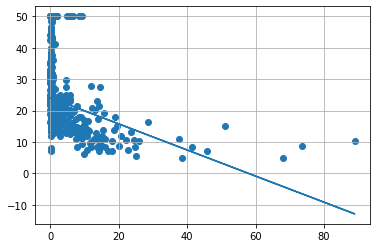

In [13]:
plt.scatter(crime['CRIM'], boston_raw_data['label'])
plt.plot(crime['CRIM'], crime_predict)
plt.grid()
plt.show()

# 선형회귀
$$
    f(x) = \beta_0 + \beta_1x_1 + \epsilon
$$

- 오차는 정규분포임을 가정 
- 오차가 정규분포임을 가정한다는 건 랜덤하다는 뜻으로 예측 불가능

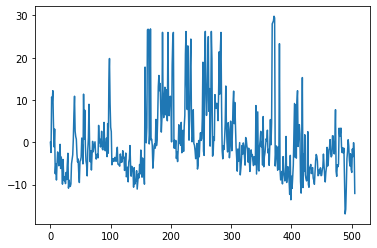

In [14]:
boston_crime_model.resid.plot()
plt.show()

## rm(방의 갯수)과 lstat(하위계층의 비율)
- 각각 단순선형회귀분석 적합 해봅시다. 
- rm과 집값(label)
- lstat와 집값(label)

In [15]:
rm = boston_raw_data['RM']
lstat = boston_raw_data['LSTAT']

rm = sm.add_constant(rm, has_constant='add')
lstat = sm.add_constant(lstat, has_constant='add')

In [16]:
boston_rm_model = sm.OLS(boston_raw_data['label'], rm).fit()
boston_lstat_model = sm.OLS(boston_raw_data['label'], lstat).fit()

In [17]:
boston_rm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  label   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Fri, 08 Jan 2021   Prob (F-statistic):           2.49e-74
Time:                        00:15:04   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -34.6706      2.650    -13.084      0.000     -39.877     -29.465
RM             9.1021      0.419     21.722      0.000       8.279       9.925
==============================================================================
Omnibus:                      102.585   Durbin-Watson:                   0.684
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              612.449
Skew:                           0.726   Prob(JB):                    1.02e-133
Kurtosis:                       8.190   Cond. No.                         58.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
rm_predict = boston_rm_model.predict(rm)

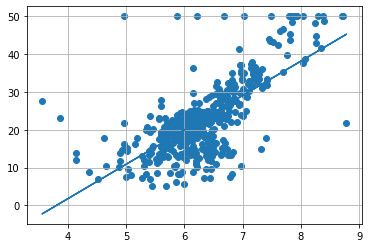

In [19]:
plt.scatter(rm['RM'], boston_raw_data['label'])
plt.plot(rm['RM'], rm_predict)
plt.grid()
plt.show()

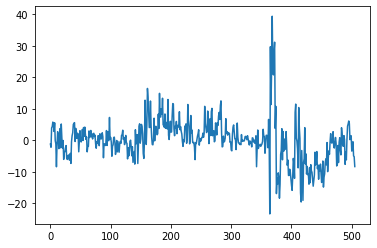

In [20]:
boston_rm_model.resid.plot()
plt.show()

In [21]:
boston_lstat_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  label   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Fri, 08 Jan 2021   Prob (F-statistic):           5.08e-88
Time:                        00:15:06   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.5538      0.563     61.415      0.000      33.448      35.659
LSTAT         -0.9500      0.039    -24.528      0.000      -1.026      -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
lstat_predict = boston_lstat_model.predict(lstat)

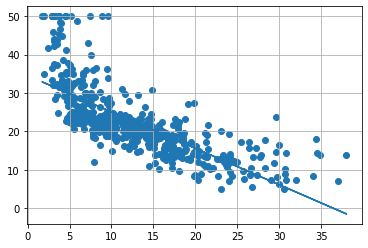

In [23]:
plt.scatter(lstat['LSTAT'], boston_raw_data['label'])
plt.plot(lstat['LSTAT'], lstat_predict)
plt.grid()
plt.show()

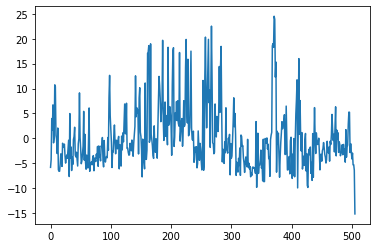

In [24]:
boston_lstat_model.resid.plot()
plt.show()

## 다중선형회귀분석 실습
- crime, rm, lstat

In [25]:
multi = boston_raw_data[['CRIM', 'RM', 'LSTAT']]
multi = sm.add_constant(multi, has_constant='add')
target = boston_raw_data['label']

In [26]:
boston_multi_model = sm.OLS(target, multi).fit()

In [27]:
boston_multi_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  label   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     305.2
Date:                Fri, 08 Jan 2021   Prob (F-statistic):          1.01e-112
Time:                        00:15:08   Log-Likelihood:                -1577.6
No. Observations:                 506   AIC:                             3163.
Df Residuals:                     502   BIC:                             3180.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.5623      3.166     -0.809      0.419      -8.783       3.658
CRIM          -0.1029      0.032     -3.215      0.001      -0.166      -0.040
RM             5.2170      0.442     11.802      0.000       4.348       6.085
LSTAT         -0.5785      0.048    -12.135      0.000      -0.672      -0.485
==============================================================================
Omnibus:                      171.754   Durbin-Watson:                   0.822
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              628.308
Skew:                           1.535   Prob(JB):                    3.67e-137
Kurtosis:                       7.514   Cond. No.                         216.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
boston_lstat_model.params

const    34.553841
LSTAT    -0.950049
dtype: float64

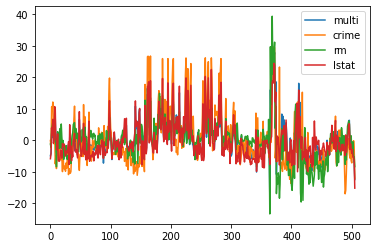

In [29]:
boston_multi_model.resid.plot(label='multi')
boston_crime_model.resid.plot(label='crime')
boston_rm_model.resid.plot(label='rm')
boston_lstat_model.resid.plot(label='lstat')
plt.legend()
plt.show()

## 전체 변수를 이용한 full 모델도 만들어 볼게요 

In [30]:
full = boston_raw_data.iloc[:,1:]
full = sm.add_constant(full, has_constant='add')
target = boston_raw_data['label']

In [31]:
boston_full_model = sm.OLS(target, full).fit()

In [32]:
boston_full_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  label   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Fri, 08 Jan 2021   Prob (F-statistic):          6.72e-135
Time:                        00:15:09   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.000      26.432      46.487
CRIM          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
ZN             0.0464      0.014      3.382      0.001       0.019       0.073
INDUS          0.0206      0.061      0.334      0.738      -0.100       0.141
CHAS           2.6867      0.862      3.118      0.002       0.994       4.380
NOX          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
RM             3.8099      0.418      9.116      0.000       2.989       4.631
AGE            0.0007      0.013      0.052      0.958      -0.025       0.027
DIS           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
RAD            0.3060      0.066      4.613      0.000       0.176       0.436
TAX           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
PTRATIO       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
B              0.0093      0.003      3.467      0.001       0.004       0.015
LSTAT         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

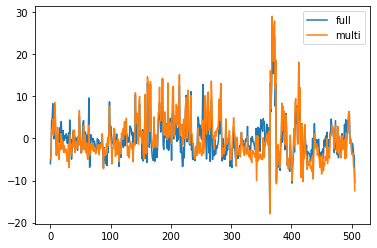

In [33]:
boston_full_model.resid.plot(label='full')
boston_multi_model.resid.plot(label='multi')
plt.legend()
plt.show()

## 상관계수를 통한 다중공선성 확인

In [34]:
full.corr()

,const,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
const,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CRIM,NaN,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621
ZN,NaN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
INDUS,NaN,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
CHAS,NaN,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
NOX,NaN,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
RM,NaN,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
AGE,NaN,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
DIS,NaN,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
RAD,NaN,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676


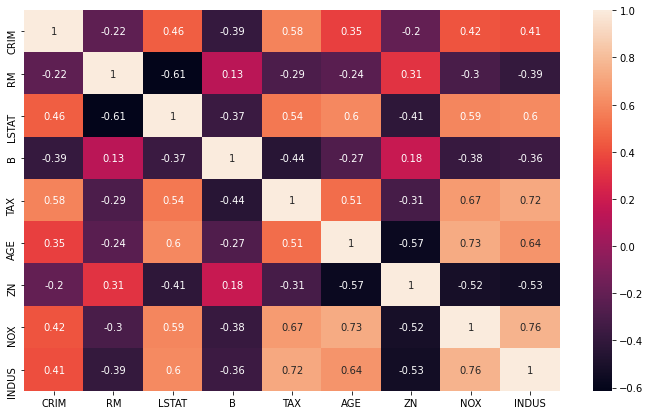

In [35]:
plt.figure(figsize=(12, 7))
sns.heatmap(full[['CRIM', 'RM', 'LSTAT', 'B', 'TAX', 'AGE', 'ZN', 'NOX', 'INDUS']].corr(), annot=True)
plt.show()

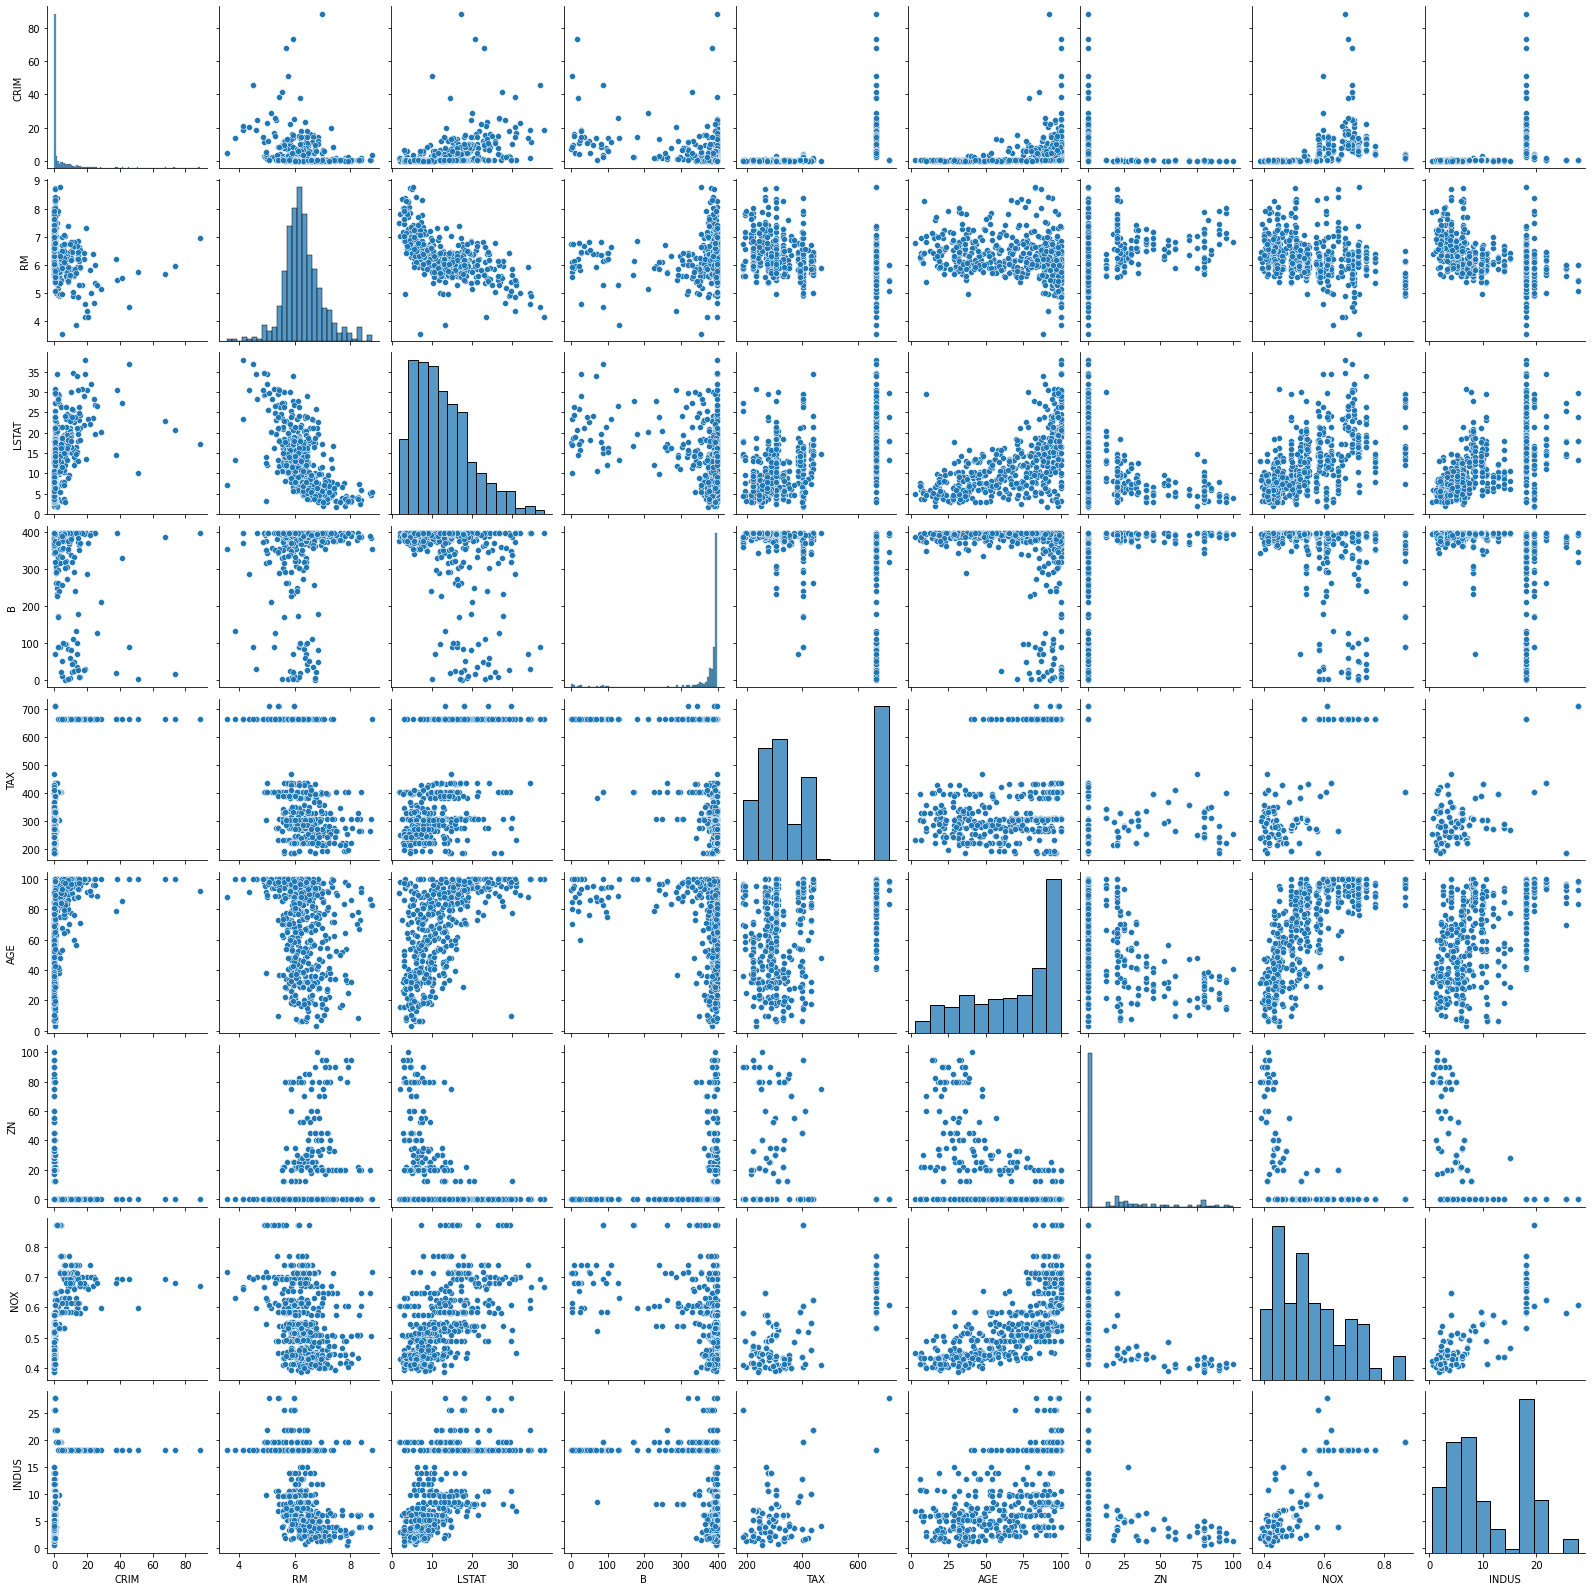

In [36]:
sns.pairplot(full[['CRIM', 'RM', 'LSTAT', 'B', 'TAX', 'AGE', 'ZN', 'NOX', 'INDUS']])
plt.show()

## VIF를 통한 다중공선성 확인 

In [37]:
vif = pd.DataFrame()
vif_data = full.drop(['const', 'CHAS', 'PTRATIO', 'NOX', 'TAX', 'RM'], axis=1)
vif['VIF Factor'] = [variance_inflation_factor(
    vif_data.values, i) for i in range(vif_data.shape[1])
]
vif['features'] = vif_data.columns

In [38]:
vif

,VIF Factor,features
0,2.089933,CRIM
1,2.331347,ZN
2,8.985794,INDUS
3,13.876848,AGE
4,8.414378,DIS
5,4.771754,RAD
6,13.475807,B
7,8.260737,LSTAT


In [39]:
boston_full_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  label   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Fri, 08 Jan 2021   Prob (F-statistic):          6.72e-135
Time:                        00:16:43   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.000      26.432      46.487
CRIM          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
ZN             0.0464      0.014      3.382      0.001       0.019       0.073
INDUS          0.0206      0.061      0.334      0.738      -0.100       0.141
CHAS           2.6867      0.862      3.118      0.002       0.994       4.380
NOX          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
RM             3.8099      0.418      9.116      0.000       2.989       4.631
AGE            0.0007      0.013      0.052      0.958      -0.025       0.027
DIS           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
RAD            0.3060      0.066      4.613      0.000       0.176       0.436
TAX           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
PTRATIO       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
B              0.0093      0.003      3.467      0.001       0.004       0.015
LSTAT         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [40]:
vif_data = sm.add_constant(vif_data, has_constant='add')
boston_vif_model = sm.OLS(target, vif_data).fit()

In [41]:
boston_vif_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  label   R-squared:                       0.626
Model:                            OLS   Adj. R-squared:                  0.620
Method:                 Least Squares   F-statistic:                     104.1
Date:                Fri, 08 Jan 2021   Prob (F-statistic):          4.15e-101
Time:                        00:16:43   Log-Likelihood:                -1591.3
No. Observations:                 506   AIC:                             3201.
Df Residuals:                     497   BIC:                             3239.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.3775      2.131     18.481      0.000      35.191      43.564
CRIM          -0.1117      0.039     -2.854      0.004      -0.189      -0.035
ZN             0.0945      0.015      6.361      0.000       0.065       0.124
INDUS         -0.2850      0.061     -4.687      0.000      -0.404      -0.166
AGE            0.0131      0.015      0.878      0.380      -0.016       0.042
DIS           -1.8153      0.221     -8.219      0.000      -2.249      -1.381
RAD            0.0255      0.043      0.590      0.556      -0.059       0.111
B              0.0070      0.003      2.200      0.028       0.001       0.013
LSTAT         -0.8757      0.050    -17.532      0.000      -0.974      -0.778
==============================================================================
Omnibus:                      128.163   Durbin-Watson:                   1.047
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              278.569
Skew:                           1.340   Prob(JB):                     3.23e-61
Kurtosis:                       5.457   Cond. No.                     3.17e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.17e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [42]:
x = full
y = target

train_x, test_x, train_y, test_y = train_test_split(x, y, train_size=0.8, test_size=0.2, random_state=1234)

In [43]:
boston_full_train_model = sm.OLS(train_y, train_x).fit()

In [44]:
boston_full_train_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  label   R-squared:                       0.725
Model:                            OLS   Adj. R-squared:                  0.716
Method:                 Least Squares   F-statistic:                     79.10
Date:                Fri, 08 Jan 2021   Prob (F-statistic):          1.19e-100
Time:                        00:16:43   Log-Likelihood:                -1197.0
No. Observations:                 404   AIC:                             2422.
Df Residuals:                     390   BIC:                             2478.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         45.7372      5.822      7.856      0.000      34.291      57.183
CRIM          -0.1020      0.038     -2.658      0.008      -0.178      -0.027
ZN             0.0601      0.015      3.895      0.000       0.030       0.090
INDUS          0.0348      0.071      0.490      0.624      -0.105       0.174
CHAS           3.0035      0.952      3.155      0.002       1.132       4.875
NOX          -20.4147      4.291     -4.758      0.000     -28.851     -11.979
RM             2.8937      0.472      6.136      0.000       1.966       3.821
AGE           -0.0053      0.015     -0.350      0.727      -0.035       0.025
DIS           -1.7626      0.242     -7.292      0.000      -2.238      -1.287
RAD            0.3389      0.076      4.435      0.000       0.189       0.489
TAX           -0.0135      0.004     -3.056      0.002      -0.022      -0.005
PTRATIO       -1.0192      0.148     -6.897      0.000      -1.310      -0.729
B              0.0104      0.003      3.500      0.001       0.005       0.016
LSTAT         -0.5257      0.055     -9.616      0.000      -0.633      -0.418
==============================================================================
Omnibus:                      150.919   Durbin-Watson:                   2.066
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              659.360
Skew:                           1.590   Prob(JB):                    6.64e-144
Kurtosis:                       8.391   Cond. No.                     1.52e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.52e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

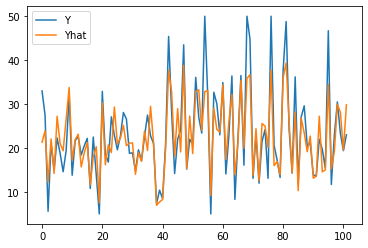

In [45]:
full_train_predict = boston_full_train_model.predict(test_x)
plt.plot(np.array(test_y), label='Y')
plt.plot(np.array(full_train_predict), label='Yhat')
plt.legend()
plt.show()

In [46]:
x = vif_data
y = target

train_x, test_x, train_y, test_y = train_test_split(x, y, train_size=0.8, test_size=0.2, random_state=1234)

In [47]:
boston_vif_train_model = sm.OLS(train_y, train_x).fit()

In [48]:
boston_vif_train_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  label   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.612
Method:                 Least Squares   F-statistic:                     80.38
Date:                Fri, 08 Jan 2021   Prob (F-statistic):           4.24e-78
Time:                        00:16:45   Log-Likelihood:                -1262.6
No. Observations:                 404   AIC:                             2543.
Df Residuals:                     395   BIC:                             2579.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         38.8754      2.424     16.035      0.000      34.109      43.642
CRIM          -0.1023      0.045     -2.289      0.023      -0.190      -0.014
ZN             0.1072      0.016      6.632      0.000       0.075       0.139
INDUS         -0.2680      0.067     -3.972      0.000      -0.401      -0.135
AGE           -0.0022      0.017     -0.126      0.900      -0.036       0.031
DIS           -1.9407      0.262     -7.405      0.000      -2.456      -1.425
RAD            0.0252      0.047      0.534      0.594      -0.068       0.118
B              0.0086      0.003      2.511      0.012       0.002       0.015
LSTAT         -0.7982      0.053    -14.982      0.000      -0.903      -0.693
==============================================================================
Omnibus:                      118.869   Durbin-Watson:                   1.954
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.097
Skew:                           1.434   Prob(JB):                     5.61e-67
Kurtosis:                       6.146   Cond. No.                     3.27e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.27e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

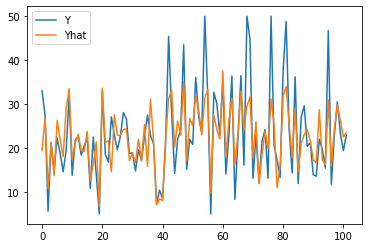

In [49]:
vif_train_predict = boston_vif_train_model.predict(test_x)
plt.plot(np.array(test_y), label='Y')
plt.plot(np.array(vif_train_predict), label='Yhat')
plt.legend()
plt.show()

## MSE를 통한 검증에 대한 성능 비교
- Mean Squared Error

In [50]:
x = full
y = target

train_x, test_x, train_y, test_y = train_test_split(x, y, train_size=0.8, test_size=0.2, random_state=1234)
boston_full_train_model = sm.OLS(train_y, train_x).fit()
mean_squared_error(y_true=test_y, y_pred=boston_full_train_model.predict(test_x))

23.96457138495688

In [51]:
x = vif_data
y = target

train_x, test_x, train_y, test_y = train_test_split(x, y, train_size=0.8, test_size=0.2, random_state=1234)
boston_vif_train_model = sm.OLS(train_y, train_x).fit()
mean_squared_error(y_true=test_y, y_pred=boston_vif_train_model.predict(test_x))

37.79811056353681